<a href="https://colab.research.google.com/github/Thusharkanth/machine_learning_CW/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ML_CW/bank-additional-full.csv'  # Update with your file path
import pandas as pd

df = pd.read_csv(file_path, sep=';')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# understanding the data

print ('First 5 rows of the dataset : ')
print (df.head())

# checking the sdata type

print("\n Dataset info ........... \n")
print(df.info())

#Statisitical summary of the numerial data

print("\n Statistical summary of the numerical data .......\n")
print(df.describe())

First 5 rows of the dataset : 
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.c

In [4]:
# handling the missing values
# Replacing the value 'unknow' to NaN for easy handling

df.replace ('unknown', np.nan, inplace=True)

# checking the missing value

print ("\n Missing Values per coloumn .............\n")
print (df.isnull().sum())


# Drop rows with cirital missing value (job , education )
# since we have large data and the missing value is small part the information loss is less than 0.64% and 4.22% respectivitly

df.dropna(subset =['job','education'], inplace= True )

print ('\n Missing value after droppping \n ')
print (df.isnull().sum())


# Fill missing values for 'default', 'housing', 'loan', 'contact', and 'poutcome' with their mode
for col in ['default', 'housing', 'loan', 'contact', 'poutcome','marital']:
    df[col] = df[col].fillna(df[col].mode()[0])  # Assign after filling



# Check for missing values again to confirm
print("\nMissing Values after Filling:")
print(df.isnull().sum())
print(df.head())



 Missing Values per coloumn .............

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

 Missing value after droppping 
 
age                  0
job                  0
marital             67
education            0
default           7971
housing            947
loan               947
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m  

In [5]:
# encoding the Categorical varible
# convert the binary values to 0/1

binary_columns =[ 'default','housing', 'loan']
for col in binary_columns:
  df[col] = df[col].map({'yes':1, 'no':0})

print(df.head())

   age        job  marital    education  default  housing  loan    contact  \
0   56  housemaid  married     basic.4y        0        0     0  telephone   
1   57   services  married  high.school        0        0     0  telephone   
2   37   services  married  high.school        0        1     0  telephone   
3   40     admin.  married     basic.6y        0        0     0  telephone   
4   56   services  married  high.school        0        0     1  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m 

In [6]:
# one-hot encoding categorical varibles

df = pd.get_dummies(df, columns=['job','marital', 'education','contact', 'poutcome','month','day_of_week'], drop_first=True)

# showing encodedd date
print ('\n Encoded data \n')
print (df.head())


 Encoded data 

   age  default  housing  loan  duration  campaign  pdays  previous  \
0   56        0        0     0       261         1    999         0   
1   57        0        0     0       149         1    999         0   
2   37        0        1     0       226         1    999         0   
3   40        0        0     0       151         1    999         0   
4   56        0        0     1       307         1    999         0   

   emp.var.rate  cons.price.idx  ...  month_jun  month_mar  month_may  \
0           1.1          93.994  ...      False      False       True   
1           1.1          93.994  ...      False      False       True   
2           1.1          93.994  ...      False      False       True   
3           1.1          93.994  ...      False      False       True   
4           1.1          93.994  ...      False      False       True   

  month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0     False      False      False             

In [7]:
# Converting the traget column (y) into binary fromate

df['y'] = df['y'].map({'yes':1, 'no':0})

# check the traget column
print ('\n Traget column \n')
print (df['y'])



 Traget column 

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 39258, dtype: int64


In [8]:
# normalize/ Standardize the numarial features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# selkec numaerial coloums for scale
numerical_features = ['age', 'campaign', 'pdays', 'previous',
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

# display the scaled featuer
print ('\n Scaled data \n')
print (df[numerical_features].head())


 Scaled data 

        age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
0  1.568793 -0.564894  0.192586 -0.349438       0.64955        0.732239   
1  1.665981 -0.564894  0.192586 -0.349438       0.64955        0.732239   
2 -0.277771 -0.564894  0.192586 -0.349438       0.64955        0.732239   
3  0.013792 -0.564894  0.192586 -0.349438       0.64955        0.732239   
4  1.568793 -0.564894  0.192586 -0.349438       0.64955        0.732239   

   cons.conf.idx  euribor3m  nr.employed  
0       0.894984   0.713179     0.329145  
1       0.894984   0.713179     0.329145  
2       0.894984   0.713179     0.329145  
3       0.894984   0.713179     0.329145  
4       0.894984   0.713179     0.329145  


In [9]:
# spilting the dataset

from sklearn.model_selection import train_test_split

X = df.drop(columns=['y'])  # features
y = df['y']    # traget varible

# Split into tarimg 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Testing Set Sizes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")



Training and Testing Set Sizes:
X_train: (31406, 47), X_test: (7852, 47)
y_train: (31406,), y_test: (7852,)


In [10]:
# to verify that the dataset
print(df['y'].isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())
print('\n ------------------------------\n')
print(df.head())


0
0
0

 ------------------------------

        age  default  housing  loan  duration  campaign     pdays  previous  \
0  1.568793        0        0     0       261 -0.564894  0.192586 -0.349438   
1  1.665981        0        0     0       149 -0.564894  0.192586 -0.349438   
2 -0.277771        0        1     0       226 -0.564894  0.192586 -0.349438   
3  0.013792        0        0     0       151 -0.564894  0.192586 -0.349438   
4  1.568793        0        0     1       307 -0.564894  0.192586 -0.349438   

   emp.var.rate  cons.price.idx  ...  month_jun  month_mar  month_may  \
0       0.64955        0.732239  ...      False      False       True   
1       0.64955        0.732239  ...      False      False       True   
2       0.64955        0.732239  ...      False      False       True   
3       0.64955        0.732239  ...      False      False       True   
4       0.64955        0.732239  ...      False      False       True   

   month_nov  month_oct  month_sep  day_of_wee

In [11]:
# handling class imbalance

from imblearn.over_sampling import SMOTE

smote =  SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# after balancing --display

print("\nAfter Balancing:")
print(y_train_resampled.value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



After Balancing:
y
0    27908
1    27908
Name: count, dtype: int64


In [12]:
# Save the preprocessed data
X_train_path = 'X_train_resampled.csv'
X_test_path = 'X_test.csv'
y_train_path = 'y_train_resampled.csv'
y_test_path = 'y_test.csv'

X_train_resampled.to_csv(X_train_path, index=False)
X_test.to_csv(X_test_path, index=False)
y_train_resampled.to_csv(y_train_path, index=False)
y_test.to_csv(y_test_path, index=False)

print("Preprocessed data saved to CSV files.")

# Import the files module from Google Colab
from google.colab import files

# Download the saved files
print("\nDownloading files to your local machine...")
files.download(X_train_path)
files.download(X_test_path)
files.download(y_train_path)
files.download(y_test_path)


Preprocessed data saved to CSV files.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

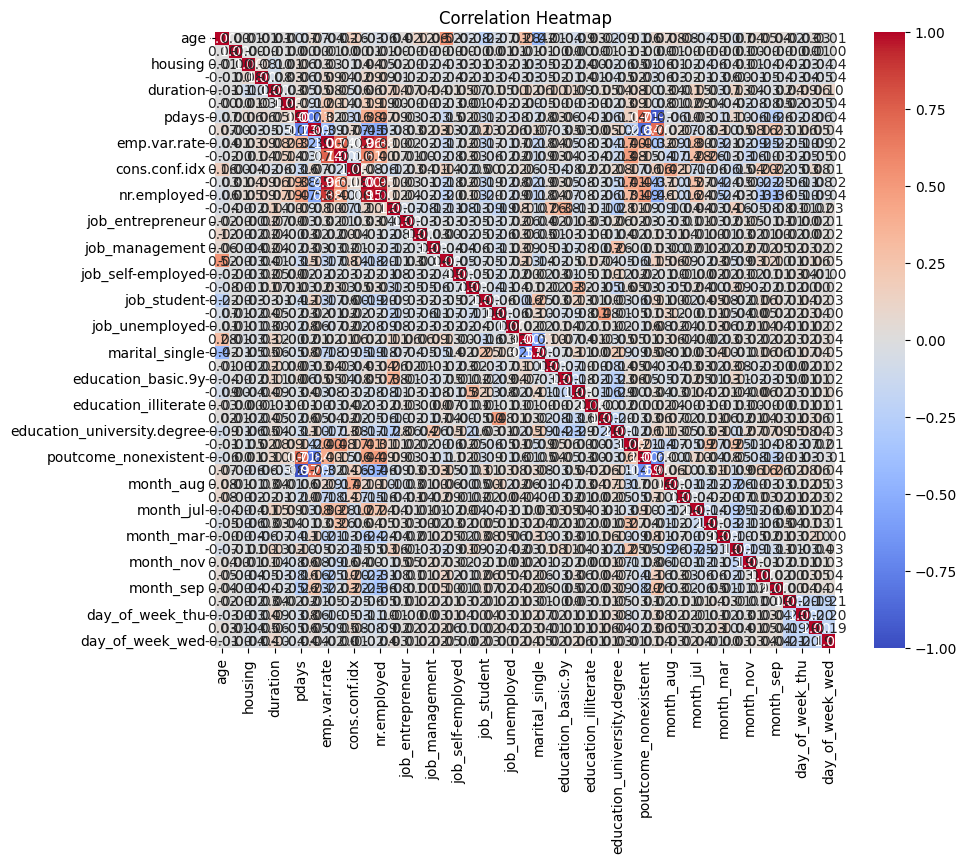

In [13]:
# feature selection part

import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
X_train_selection = pd.read_csv('X_train_resampled.csv')

# compute the correlation matrixs
corr_matrix = X_train_selection.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",  vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show()


In [14]:
# implementing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# intialize the Random foreset Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model using the training dataset

rf_model.fit(X_train_resampled, y_train_resampled)

# make predictions on the test dataset

y_predict_rf = rf_model.predict(X_test)

print ('Random Forest Classifier \n')

# calculate the accuracy
accuracy = accuracy_score(y_test, y_predict_rf)*100
print(f"Accuracy: {accuracy:.2f}% \n")

# calculate the Precision
precision = precision_score(y_test, y_predict_rf) * 100
print(f"Precision: {precision:.2f}% \n")

# calculate the Recall
recall = recall_score(y_test, y_predict_rf) * 100
print(f"Recall: {recall:.2f}% \n")

# calculate f1 - score
f1 = f1_score(y_test, y_predict_rf) * 100
print(f"F1-Score: {f1:.2f}% \n")

# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_predict_rf)*100
print(f"ROC-AUC Score: {roc_auc:.2f}% \n")

# calculate the Confusion matrixs
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predict_rf))


Random Forest Classifier 

Accuracy: 91.81% 

Precision: 64.39% 

Recall: 58.55% 

F1-Score: 61.33% 

ROC-AUC Score: 77.26% 

Confusion Matrix:
 [[6699  282]
 [ 361  510]]


In [15]:
# implementing Neuraal netwirk

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# intizializing the Netural newtow

nn_model = Sequential()
nn_model.add(Dense(32, input_dim=X_train_resampled.shape[1], activation='relu'))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# compile the model

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# train the model
nn_model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# make predictions on the test dataset
y_predict_nn = (nn_model.predict(X_test) >0.5).astype("int32")

# eveluate the Nural network
print ('Neuraal Network Classifier \n')

# calculate the accuracy
accuracy = accuracy_score(y_test, y_predict_nn)*100
print(f"Accuracy: {accuracy:.2f}% \n")

# calculate the Precision
precision = precision_score(y_test, y_predict_nn) * 100
print(f"Precision: {precision:.2f}% \n")

# calculate the Recall
recall = recall_score(y_test, y_predict_nn) * 100
print(f"Recall: {recall:.2f}% \n")

# calculate f1 - score
f1 = f1_score(y_test, y_predict_nn) * 100
print(f"F1-Score: {f1:.2f}% \n")

# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_predict_nn)*100
print(f"ROC-AUC Score: {roc_auc:.2f}% \n")

# calculate the Confusion matrixs
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predict_nn))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7563 - loss: 1.1429 - val_accuracy: 0.9213 - val_loss: 0.2359
Epoch 2/20
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8848 - loss: 0.2725 - val_accuracy: 0.8931 - val_loss: 0.2900
Epoch 3/20
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9030 - loss: 0.2315 - val_accuracy: 0.9567 - val_loss: 0.1361
Epoch 4/20
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9081 - loss: 0.2195 - val_accuracy: 0.9612 - val_loss: 0.1576
Epoch 5/20
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9134 - loss: 0.2031 - val_accuracy: 0.9631 - val_loss: 0.1163
Epoch 6/20
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9156 - loss: 0.1973 - val_accuracy: 0.9739 - val_loss: 0.1109
Epoch 7/20
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9125 - loss: 0.2031 - val_accuracy: 0.9778 - val_loss: 0.0848
Epoch 8/20
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9172 - loss: 0.1933 -

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


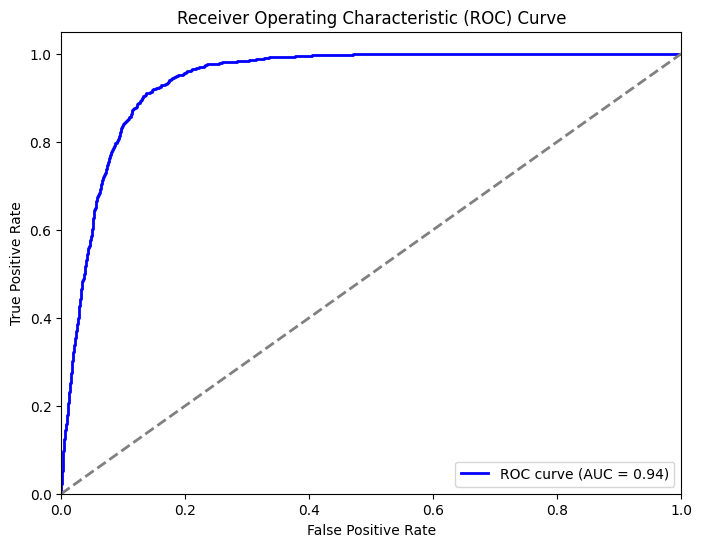

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_prob_nn = nn_model.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nn)

# Compute the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


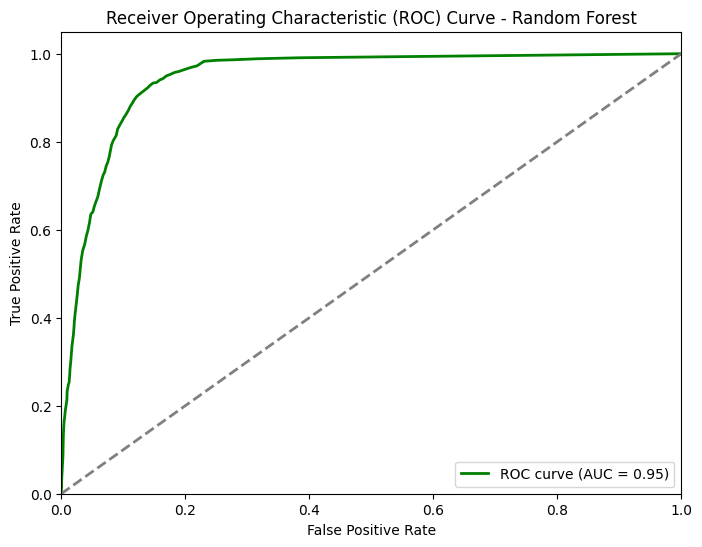

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Compute the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()
